In [1]:
import pandas as pd

df = pd.read_csv('/Users/baochikhuc/Documents/microfiltration_model_2024/Data-driven Model/Processed Data with Selectivity/last_rows_processed.csv')
columns_to_plot = ['X', 'I', 'pH', 'Re', 'J_actual', 'Time (s)']

In [4]:
df.columns


Index(['Time (s)', '5nm_retentate', '5nm_permeate', '5nm_cumulative_yield',
       '40nm_retentate', '40nm_permeate', '40nm_cumulative_yield',
       '70nm_retentate', '70nm_permeate', '70nm_cumulative_yield',
       '120nm_retentate', '120nm_permeate', '120nm_cumulative_yield',
       '190nm_retentate', '190nm_permeate', '190nm_cumulative_yield',
       '300nm_retentate', '300nm_permeate', '300nm_cumulative_yield',
       '700nm_retentate', '700nm_permeate', '700nm_cumulative_yield',
       '2500nm_retentate', '2500nm_permeate', '2500nm_cumulative_yield',
       'Diavolumes', '5nm_size_solute', '40nm_size_solute', '70nm_size_solute',
       '120nm_size_solute', '190nm_size_solute', '300nm_size_solute',
       '700nm_size_solute', '2500nm_size_solute', 'X', 'I', 'pH', 'Re', 'J_PD',
       'J_actual', '5nm_sieving_coefficient', '40nm_sieving_coefficient',
       '70nm_sieving_coefficient', '120nm_sieving_coefficient',
       '190nm_sieving_coefficient', '300nm_sieving_coefficient',
    

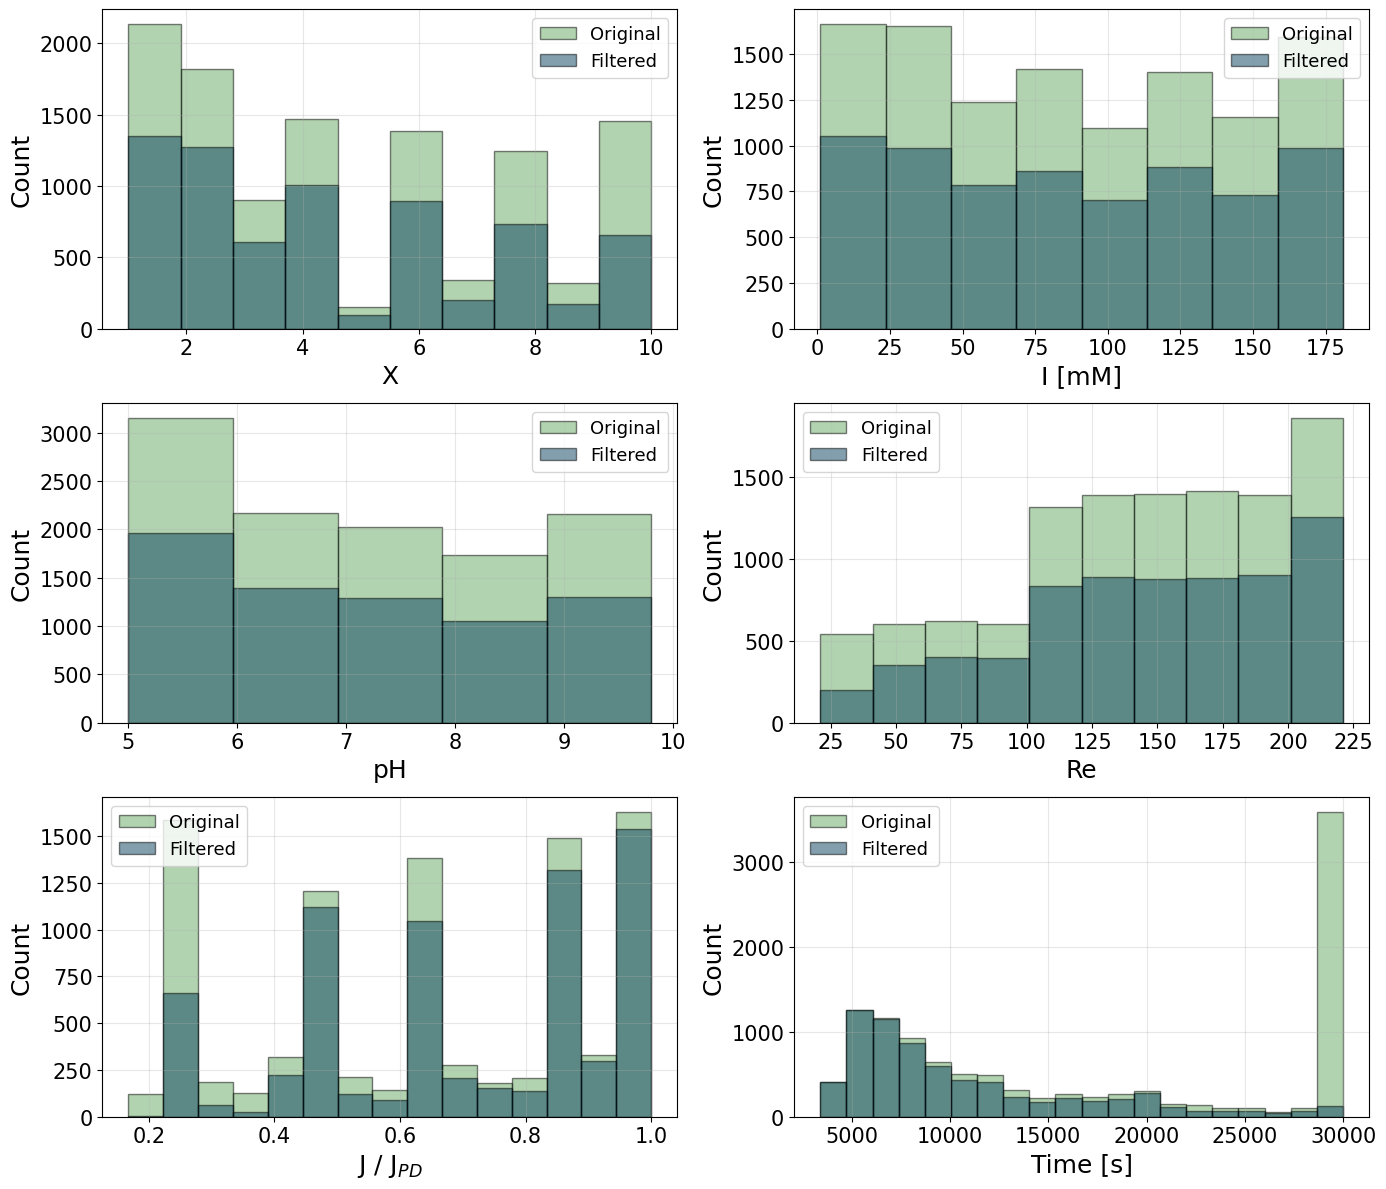

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Filter the dataframe for 5nm_cumulative_yield >= 94%
filtered_df = df[df['5nm_cumulative_yield'] >= 0.94]
filtered_df = filtered_df.rename(columns={'I': 'I [mM]', 'Time (s)': 'Time [s]'})
df = df.rename(columns={'I': 'I [mM]', 'Time (s)': 'Time [s]'})

# Define the columns to plot and their corresponding bin sizes
columns_to_plot = ['X', 'I [mM]', 'pH', 'Re', 'J / J$_{PD}$', 'Time [s]']  # Updated column names
bins = [10, 8, 5, 10, 15, 20]  # Corresponding bin sizes for each column

# Creating the custom column J / J$_{PD}$ in the filtered and original DataFrames
filtered_df['J / J$_{PD}$'] = filtered_df['J_actual'] / filtered_df['J_PD']
df['J / J$_{PD}$'] = df['J_actual'] / df['J_PD']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for ax, column, bin_size in zip(axes, columns_to_plot, bins):
    # Filtered histogram
    filtered_counts, edges = np.histogram(filtered_df[column], bins=bin_size)
    
    # Original histogram
    original_counts, _ = np.histogram(df[column], bins=edges)  # Use the same edges for consistency
    
    # Plot original histogram
    ax.bar(edges[:-1], original_counts, width=np.diff(edges), edgecolor='black', align='edge', color='#66a862', alpha=0.5, label='Original')
    
    # Plot filtered histogram
    ax.bar(edges[:-1], filtered_counts, width=np.diff(edges), edgecolor='black', align='edge', color='#08415C', alpha=0.5, label='Filtered')
    
    # Add labels and grid
    ax.set_xlabel(column, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    ax.legend(fontsize=13)
    ax.tick_params(axis='both', labelsize=15)

    ax.grid(axis='y', alpha=0.3)
    ax.grid(axis='x', alpha=0.3)
  

plt.tight_layout()
plt.savefig('original_vs_filtered_histograms.png')
plt.show()


/var/folders/x1/1094qf1d4c1g3_6s3f1qxk_h0000gn/T/ipykernel_27551/3907212102.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=13)


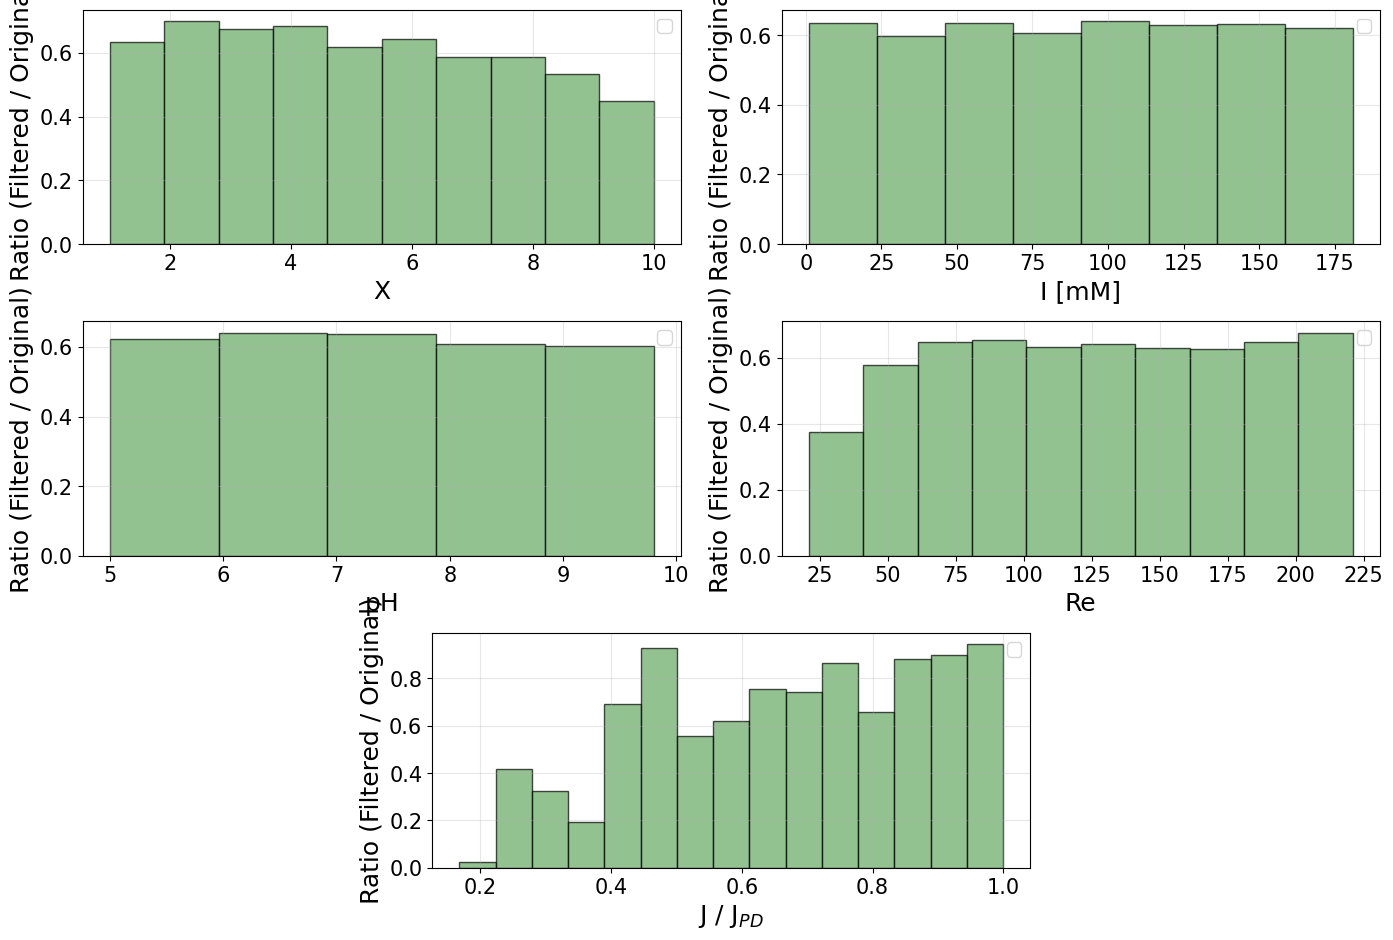

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the ratio of filtered to original histograms
fig = plt.figure(figsize=(14, 12))

# Create a 4x4 grid with custom width and height ratios
gs = fig.add_gridspec(4, 4)

# Create subplots in the grid
axes = [
    fig.add_subplot(gs[0, 0:2]),  # Top-left
    fig.add_subplot(gs[0, 2:]),   # Top-right
    fig.add_subplot(gs[1, 0:2]),  # Middle-left
    fig.add_subplot(gs[1, 2:]),   # Middle-right
    fig.add_subplot(gs[2, 1:3]),  # Bottom-middle (centered in the third row)
]

bins = [10, 8, 5, 10, 15]

for ax, column, bin_size in zip(axes[:5], columns_to_plot[:5], bins):
    # Filtered histogram
    filtered_counts, edges = np.histogram(filtered_df[column], bins=bin_size)
    
    # Original histogram (using the same bin edges as filtered)
    original_counts, _ = np.histogram(df[column], bins=edges)
    
    # Avoid division by zero
    original_counts = np.where(original_counts == 0, 1, original_counts)  # Replace zeros with 1 to avoid division errors
    
    # Calculate the ratio of filtered to original
    ratio = filtered_counts / original_counts
    
    # Plot the ratio
    ax.bar(edges[:-1], ratio, width=np.diff(edges), edgecolor='black', align='edge', color='#66a862', alpha=0.7)
    
    # Add labels and grid
    ax.set_xlabel(column,fontsize=18)
    ax.set_ylabel('Ratio (Filtered / Original)',fontsize=18)
    ax.tick_params(axis='both', labelsize=15)
    ax.grid(axis='y', alpha=0.3)
    ax.grid(axis='x', alpha=0.3)
    ax.legend(fontsize=13)

plt.tight_layout()
# fig.subplots_adjust(hspace=0.5, wspace=0.7)  # Increase horizontal and vertical spacing

plt.savefig('filtered_over_original_ratio.png')
plt.show()

# 
#


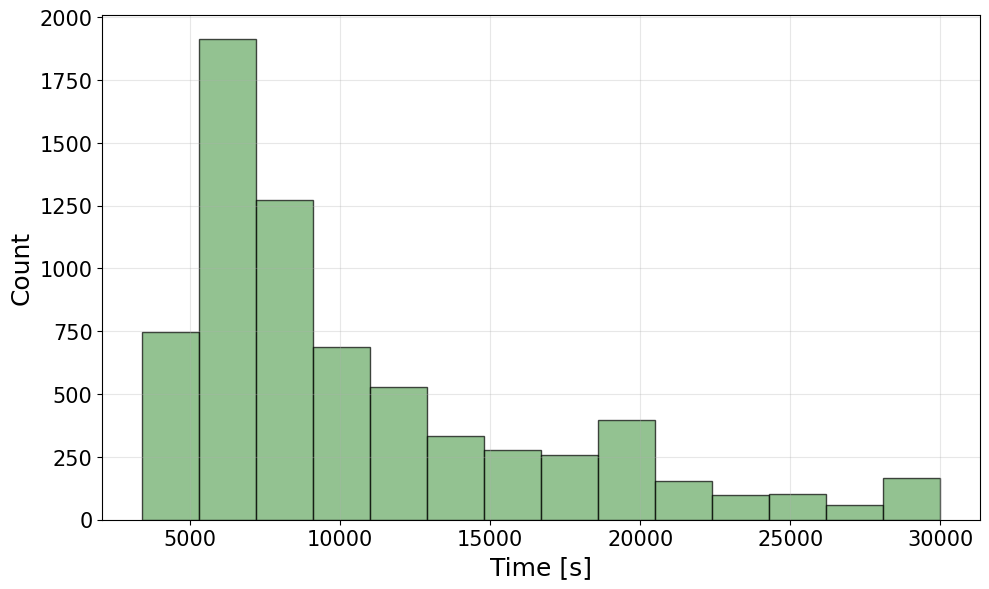

In [24]:
# Plot the time histogram using the filtered dataframe
plt.figure(figsize=(10, 6))

# Define the bins for the histogram
time_bins = np.linspace(filtered_df['Time [s]'].min(), filtered_df['Time [s]'].max(), 15)

# Plot the histogram
plt.hist(filtered_df['Time [s]'], bins=time_bins, color='#66a862', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.tick_params(axis='both', labelsize=15)
plt.grid(axis='y', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig('time_histogram.png')
plt.show()

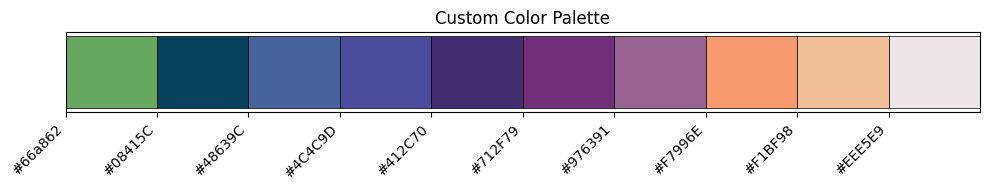

In [68]:
import matplotlib.pyplot as plt

# Define the hex color codes
colors = [ '#66a862','#08415C','#48639C','#4C4C9D','#412C70' , '#712F79','#976391', 
          '#F7996E','#F1BF98' ,'#EEE5E9' ]

# Plot a sample color palette
plt.figure(figsize=(10, 2))
for i, color in enumerate(colors):
    plt.fill_between([i, i + 1], 0, 1, color=color, edgecolor='black', linewidth=0.5)
plt.xlim(0, len(colors))
plt.gca().set_yticks([])
plt.gca().set_xticks(range(len(colors)))
plt.gca().set_xticklabels(colors, rotation=45, ha='right')
plt.title("Custom Color Palette")
plt.tight_layout()
plt.show()


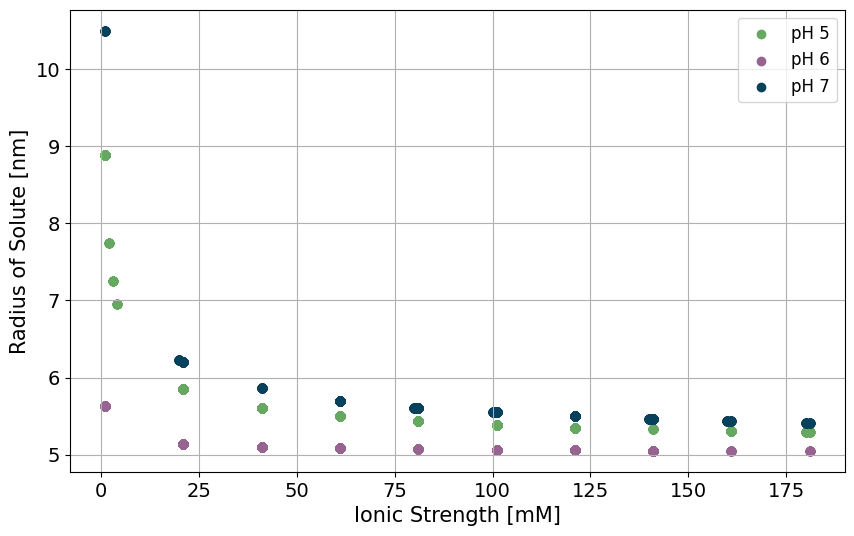

In [16]:
# Filter the dataframe for pH 5
ph_5_df = filtered_df[filtered_df['pH'] == 5]
ph_7_df = filtered_df[filtered_df['pH'] == 7]
# ph_9_df = filtered_df[filtered_df['pH'] == 9]
ph_6_df = filtered_df[filtered_df['pH'] == 6]


# Plot the size of solute 5nm across the increasing Ionic strength
plt.figure(figsize=(10, 6))
plt.scatter(ph_5_df['I [mM]'], ph_5_df['5nm_size_solute']*10e8, marker='o', color='#66a862', label='pH 5')
plt.scatter(ph_6_df['I [mM]'], ph_6_df['5nm_size_solute']*10e8, marker='o', color='#976391', label='pH 6')
plt.scatter(ph_7_df['I [mM]'], ph_7_df['5nm_size_solute']*10e8, marker='o', color='#08415C', label='pH 7')
# plt.scatter(ph_9_df['I'], ph_9_df['5nm_size_solute'], marker='o', color='#48639C', label='pH 9')

plt.xlabel('Ionic Strength [mM]',fontsize=15)
plt.ylabel('Radius of Solute [nm]',fontsize=15)
plt.tick_params(axis='both', labelsize=14)

plt.legend(fontsize=12)
# plt.yscale('log')
# plt.xscale('log')
plt.grid(True)
plt.savefig('solute_size_vs_ionic_strength_5nm.png')
plt.show()

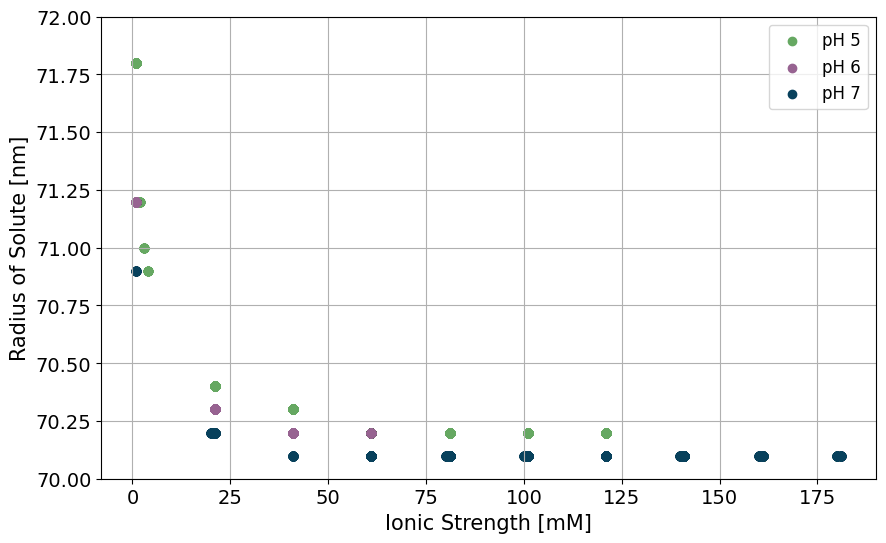

In [18]:
# Filter the dataframe for pH 5
ph_5_df = filtered_df[filtered_df['pH'] == 5]
ph_7_df = filtered_df[filtered_df['pH'] == 7]
# ph_9_df = filtered_df[filtered_df['pH'] == 9]
ph_6_df = filtered_df[filtered_df['pH'] == 6]


# Plot the size of solute 5nm across the increasing Ionic strength
plt.figure(figsize=(10, 6))
plt.scatter(ph_5_df['I [mM]'], ph_5_df['70nm_size_solute']*10e8, marker='o', color='#66a862', label='pH 5')
plt.scatter(ph_6_df['I [mM]'], ph_6_df['70nm_size_solute']*10e8, marker='o', color='#976391', label='pH 6')
plt.scatter(ph_7_df['I [mM]'], ph_7_df['70nm_size_solute']*10e8, marker='o', color='#08415C', label='pH 7')
# plt.scatter(ph_9_df['I'], ph_9_df['5nm_size_solute'], marker='o', color='#48639C', label='pH 9')

plt.xlabel('Ionic Strength [mM]',fontsize=15)
plt.ylabel('Radius of Solute [nm]',fontsize=15)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=12)
plt.ylim(70,72)
# plt.yscale('log')
# plt.xscale('log')
plt.grid(True)
plt.savefig('solute_size_vs_ionic_strength_70nm.png')
plt.show()